# 選択ソート

In [1]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import random

In [4]:
# 処理時間計測の準備：time.time() で現在時刻を取得するだけの処理にかかる時間は？
def measure_time_of_time(n):
    start = time.time()
    for i in range(n):
        time.time()
    end = time.time()
    millis = round((end-start)*1000000)
    return [n, millis, millis/n]

n_list = np.array([10000, 100000, 1000000, 10000000])
pd.DataFrame(data=[measure_time_of_time(n) for n in n_list], columns=['n', 'total time [$\mu$s]', 'average time [$\mu$s]'])

,n,total time [$\mu$s],average time [$\mu$s]
0,10000,2236,0.223600
1,100000,24443,0.244430
2,1000000,241975,0.241975
3,10000000,2255318,0.225532


In [7]:
def selection_sort(array):
    N = len(array)
    for i in range(N):
        j_minimum = i
        minimum = array[j_minimum]
        for j in range(i, N):
            if array[j] < minimum:
                j_minimum = j
                minimum = array[j]
        buff = array[i]
        array[i] = minimum
        array[j_minimum] = buff

In [8]:
arr = np.array([random.randint(0, 100) for i in range(30)])
selection_sort(arr)
arr

array([ 3, 10, 18, 25, 26, 27, 31, 35, 38, 43, 44, 50, 50, 52, 57, 59, 65,
       65, 65, 67, 72, 73, 73, 81, 84, 87, 92, 93, 93, 94])

In [9]:
n_list = []
t_list = []
for n in [1000*i for i in range(1, 10+1)]:
    arr = np.array([random.random() for i in range(n)])
    start = time.time()
    selection_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))

pd.DataFrame(data=np.array([n_list, t_list]).T, columns=['array length', 'sort time [s]'])

,array length,sort time [s]
0,1000.0,0.173805
1,2000.0,0.660636
2,3000.0,1.821947
3,4000.0,2.575411
4,5000.0,4.370674
5,6000.0,6.244293
6,7000.0,8.480759
7,8000.0,10.787750
8,9000.0,13.909670
9,10000.0,15.273409


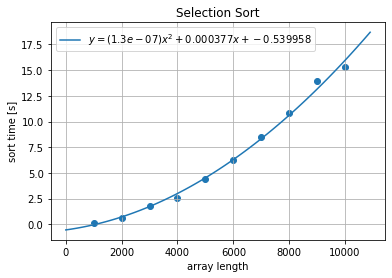

,a
0,1.272190e-07
1,3.767020e-04
2,-5.399578e-01


In [11]:
from scipy.optimize import curve_fit
def func_fit(x, a, b, c):
    return (a * x + b) * x + c

param, cov = curve_fit(func_fit, n_list, t_list)
x = np.array([i*100 for i in range(int(max(n_list)/100)+10)])
y = func_fit(x, param[0], param[1], param[2])

plt.title('Selection Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
plt.plot(x, y, label='$y = ({})x^2 + {}x + {}$'.format(round(param[0], 8), round(param[1], 6), round(param[2], 6)))
plt.scatter(n_list, t_list)
plt.grid()
plt.legend()
plt.show()

pd.DataFrame(data=param, columns=['a'])